## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

## Get the data

In [2]:
#df = pd.read_csv("../../../datasets/parte2/treino/dataset.csv")
df = pd.read_csv("../../../datasets/parte2/teste/dataset.csv")

## Feature engineering

#### Split date

In [3]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),year,month,day
0,1672531200,local,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
1,1672534800,local,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
2,1672538400,local,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
3,1672542000,local,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
4,1672545600,local,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1


#### Remove city_name

In [4]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),year,month,day
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1


#### Remove day, month, year and hour

In [5]:
df.drop('day', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),month
0,1672531200,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1672534800,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1672538400,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1672542000,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1672545600,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### Remove dt

In [6]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),month
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### Remove direct_radiation

In [7]:
#df.drop('direct_radiation (W/m²)', axis=1, inplace=True)
df.drop('shortwave_radiation_instant (W/m²)', axis=1, inplace=True)
df.drop('direct_radiation_instant (W/m²)', axis=1, inplace=True)
df.drop('diffuse_radiation_instant (W/m²)', axis=1, inplace=True)
df.drop('direct_normal_irradiance_instant (W/m²)', axis=1, inplace=True)
df.drop('terrestrial_radiation_instant (W/m²)', axis=1, inplace=True)



#### Remove feels_like, temp_min, temp_max

In [8]:
#df.drop(['feels_like', 'temp_min', 'temp_max'], axis=1, inplace=True)

## One Hot Encoding

In [9]:
df['weather_description'] = df['weather_description'].replace('clear sky', 'sky is clear')

In [10]:
lb = LabelBinarizer()

lb_results = lb.fit_transform(df['weather_description'])

lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

df = pd.concat([df, lb_results_df], axis=1)

df.drop('weather_description', axis=1, inplace=True)

In [11]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,...,terrestrial_radiation (W/m²),month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,12.93,12.76,12.72,13.43,1019,NaN,NaN,95,2.02,3.72,...,0.0,1,0,0,0,0,1,0,0,0
1,13.49,13.38,13.43,13.90,1018,NaN,NaN,95,2.18,3.26,...,0.0,1,0,0,0,0,1,0,0,0
2,13.55,13.44,13.48,14.82,1017,NaN,NaN,95,2.88,2.44,...,0.0,1,0,0,0,0,1,0,0,0
3,13.61,13.51,12.01,14.82,1016,NaN,NaN,95,3.63,1.74,...,0.0,1,0,0,0,0,1,0,0,0
4,13.59,13.49,12.01,14.82,1015,NaN,NaN,95,4.58,1.13,...,0.0,1,0,0,0,0,1,0,0,0


## Missing Values

#### Remove sea_level, grnd_level and rain_1h

In [12]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True) # experimentar a media

In [13]:
print(df.isna().sum())

temp                               0
feels_like                         0
temp_min                           0
temp_max                           0
pressure                           0
humidity                           0
wind_speed                         0
clouds_all                         0
hour                               0
normal                             0
economic_schedule                  0
self-consumption                   0
shortwave_radiation (W/m²)         0
direct_radiation (W/m²)            0
diffuse_radiation (W/m²)           0
direct_normal_irradiance (W/m²)    0
terrestrial_radiation (W/m²)       0
month                              0
broken clouds                      0
few clouds                         0
heavy intensity rain               0
light rain                         0
moderate rain                      0
overcast clouds                    0
scattered clouds                   0
sky is clear                       0
dtype: int64


## Write new csv

In [14]:
if 'injection' in df:
    df['injection'] = df['injection'].fillna("None")

In [15]:
df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,hour,normal,...,terrestrial_radiation (W/m²),month,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,12.93,12.76,12.72,13.43,1019,95,2.02,100,0,0.0,...,0.0,1,0,0,0,0,1,0,0,0
1,13.49,13.38,13.43,13.90,1018,95,2.18,100,1,0.0,...,0.0,1,0,0,0,0,1,0,0,0
2,13.55,13.44,13.48,14.82,1017,95,2.88,100,2,0.0,...,0.0,1,0,0,0,0,1,0,0,0
3,13.61,13.51,12.01,14.82,1016,95,3.63,100,3,0.0,...,0.0,1,0,0,0,0,1,0,0,0
4,13.59,13.49,12.01,14.82,1015,95,4.58,100,4,0.0,...,0.0,1,0,0,0,0,1,0,0,0


In [16]:
#df.to_csv('../../../datasets/parte2/treino/dataset_prepared.csv', index=False)
df.to_csv('../../../datasets/parte2/teste/dataset_prepared.csv', index=False)

<Axes: >

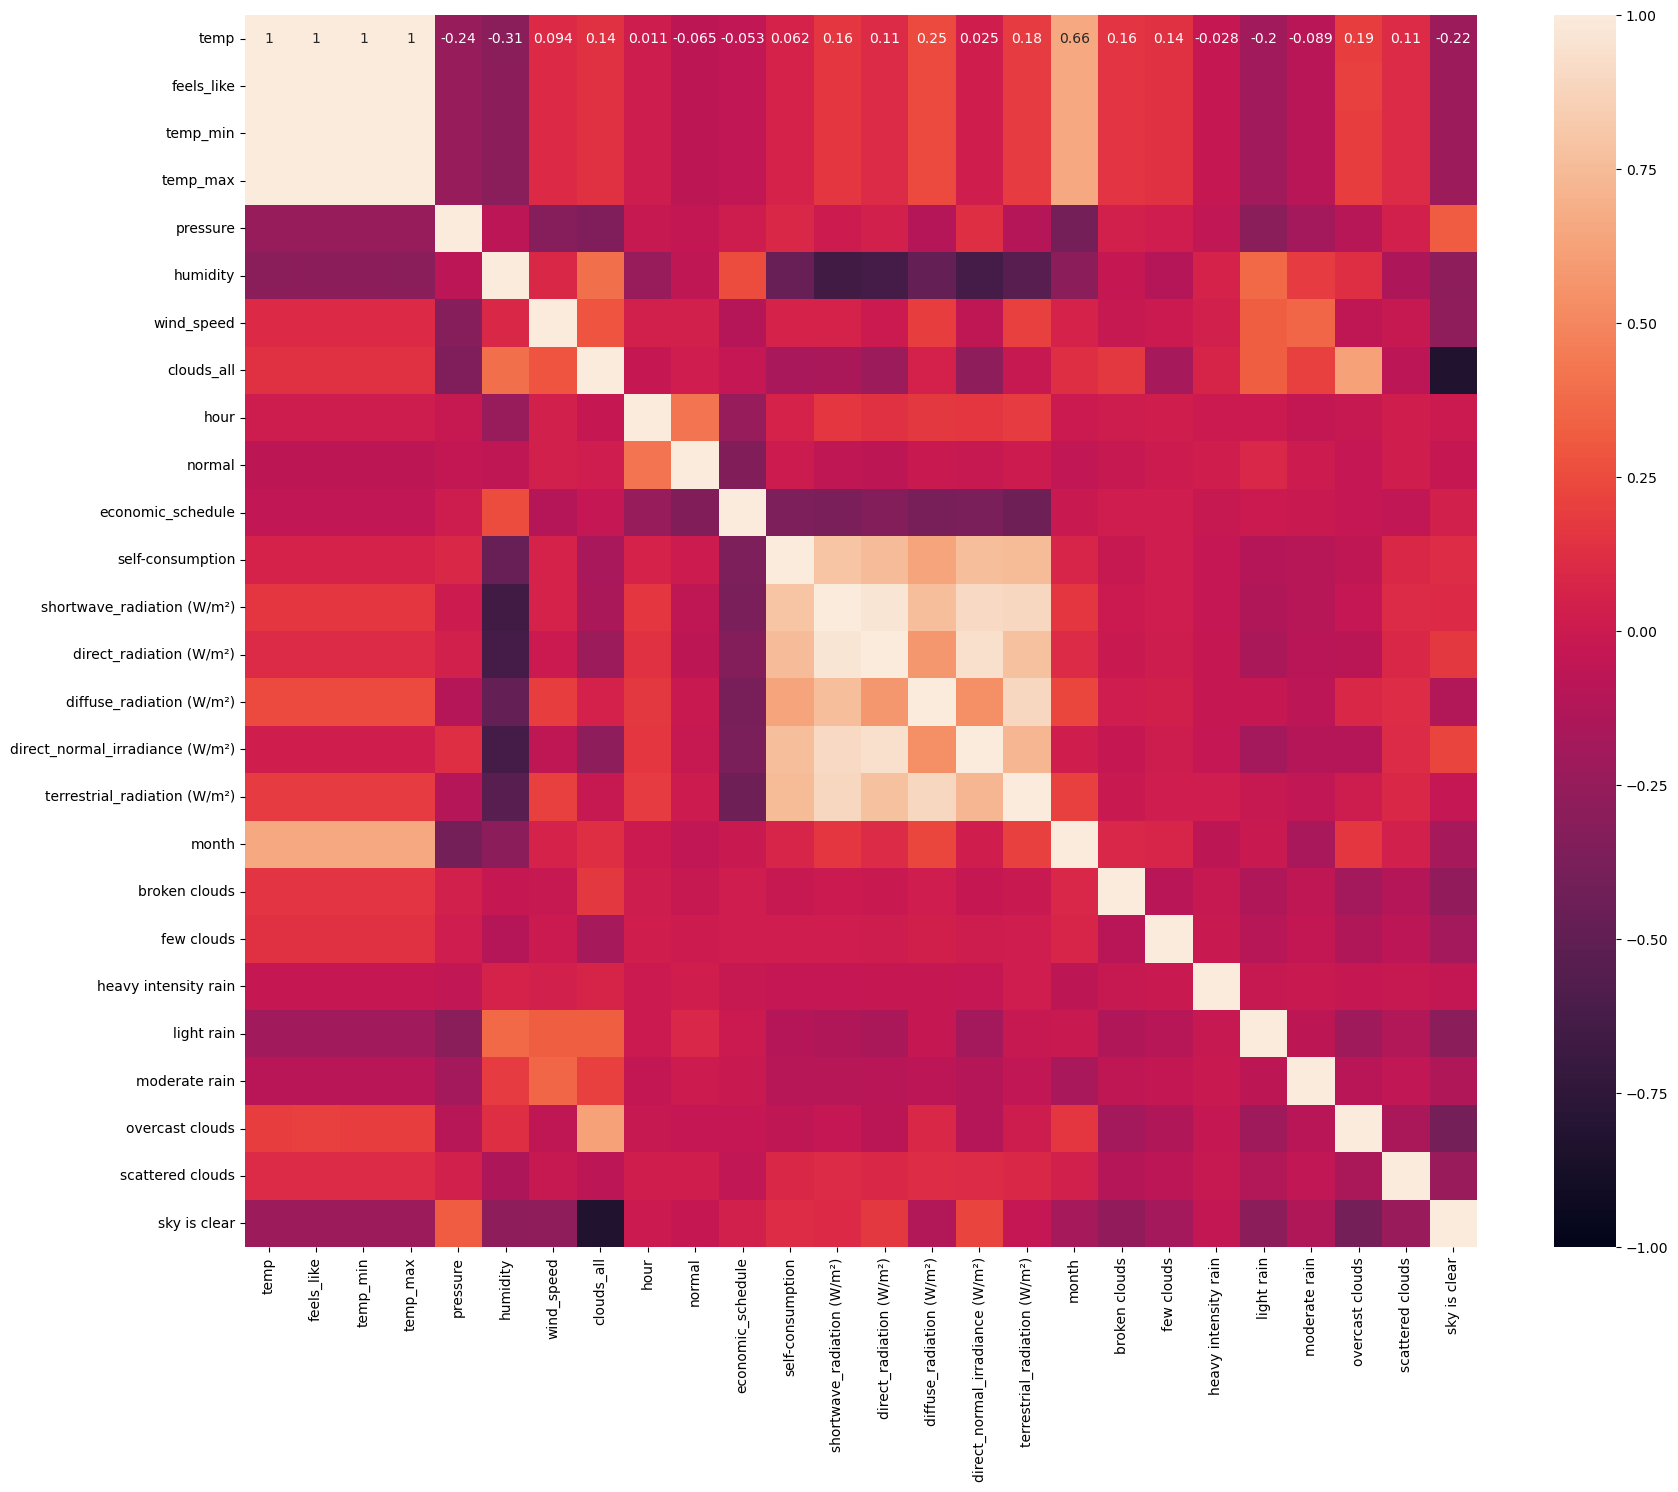

In [17]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [18]:
#print(corr_matrix['injection'])